In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df_net = pd.read_csv('netflix.csv')

In [94]:
df_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Defining Problem statement and Analysing basic metrics and observing the shape and missing value of the data


Problem statement is to analyse the given netflix data and provide insights for it

In [95]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We can see that only one column is of numerical type i.e, release_year and rest are of object type.

In [96]:
df_net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [97]:
df_net.shape

(8807, 12)

We have 8807 rows and 12 attributes in the dataset.

In [98]:
# Detecting no of missing values
df_net.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The director column has highest missing values(2389) and duration column has 1 missing value.

In [99]:
df_net.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1766
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [103]:
# Converting date-time column from object to date time
df_net['date_added'] = pd.to_datetime(df_net['date_added'], errors='coerce')

df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8712 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [104]:
df_net.describe()

,date_added,release_year
count,8712,8807.000000
mean,2019-05-22 20:19:40.165289216,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-19 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


## Non Graphical Analysis

In [105]:
df_net['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [106]:
print(df_net['title'].unique())
print(df_net['title'].nunique())

['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
8804


We have 8807 unique titles in the dataset.

In [107]:
df_net['director'].nunique()

4528

We have 4528 unique directors in the dataset.

In [108]:
df_net['date_added'].value_counts()

date_added
2020-01-01    109
2019-11-01     89
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-04-04      1
2017-03-28      1
2017-03-07      1
2017-02-27      1
2020-01-11      1
Name: count, Length: 1699, dtype: int64

In [109]:
df_net['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

Most title have been added in the year 2018.

In [110]:
df_net['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Here we can see that the data is not clean and we need to clean the data before we start with the analysis. for ex some durations are inserted in the rating which we have to move to the duration column while cleaning the data.

In [111]:
df_net['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [112]:
df_net['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

 Rajiv Chilaka has made the most movies(19) in the dataset.

In [113]:
print("No of Unique values: ",df_net['listed_in'].nunique())
print(df_net['listed_in'].unique())


No of Unique values:  514
['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, Inte

In [114]:
print("No of Unique Countries: ",df_net['country'].nunique())
print(df_net['country'].unique())

No of Unique Countries:  748
['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, Uni

A single title can have different countries

In [115]:
print("No of Unique Countries: ",df_net['cast'].nunique())
print(df_net['cast'].unique())

No of Unique Countries:  7692
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy']


Similarly, a single title can also have multiple casts


#### Preprocessing the data

In [116]:
#Unnesting cast column in a separate dataframe first
df1 = df_net[['title', 'cast']]
df1 = df1.dropna(axis = 0)
df1['cast'] = df1['cast'].str.split(',')
df1

,title,cast
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th..."
2,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ..."
4,Kota Factory,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al..."
5,Midnight Mass,"[Kate Siegel, Zach Gilford, Hamish Linklater..."
6,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsde..."
...,...,...
8801,Zinzana,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jab..."
8802,Zodiac,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe..."
8804,Zombieland,"[Jesse Eisenberg, Woody Harrelson, Emma Ston..."
8805,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kat..."


In [128]:
df1 = df1.explode('cast')
df1

,title,cast
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
1,Blood & Water,Dillon Windvogel
...,...,...
8806,Zubaan,Manish Chaudhary
8806,Zubaan,Meghna Malik
8806,Zubaan,Malkeet Rauni
8806,Zubaan,Anita Shabdish


In [129]:
# Unnesting cast column in a separate dataframe first
df2 = df_net[['title', 'country']]
df2 = df2.dropna(axis = 0)
df2['country'] = df2['country'].str.split(', ')

In [130]:
df2 = df2.explode('country')
df2

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,United States
7,Sankofa,Ghana
...,...,...
8801,Zinzana,Jordan
8802,Zodiac,United States
8804,Zombieland,United States
8805,Zoom,United States


Unnesting listed in column for the titles

In [131]:
# Now, all columns have been unnested separately, combining all tables in one
dftemp = df1.merge(df2, on="title", how="outer")
dftemp

,title,cast,country
0,Blood & Water,Ama Qamata,South Africa
1,Blood & Water,Khosi Ngema,South Africa
2,Blood & Water,Gail Mabalane,South Africa
3,Blood & Water,Thabang Molaba,South Africa
4,Blood & Water,Dillon Windvogel,South Africa
...,...,...,...
81607,Winnie,NaN,South Africa
81608,Winnie,NaN,Finland
81609,Women Behind Bars,NaN,United States
81610,Woodstock,NaN,United States


Now, merging this unnested data with the main data so we can also get the other unnested columns

In [132]:

df_final = df_net.merge(dftemp, on='title', how='outer')
df_final = df_final.drop(['cast_x', 'country_x'], axis=1)
df_final = df_final.rename({'cast_y':'cast', 'country_y':'country'},
axis = 1)

Removing the unnecessary columns and renaming the required columns

In [133]:
df_final.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,cast,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,United States
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa
3,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,South Africa
4,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,South Africa


In [134]:
df_final['duration_new'] = df_final['duration'].str.split(' ').str[0].astype(float)
df_final.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,cast,country,duration_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,United States,90.0
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,2.0
2,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,2.0
3,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,South Africa,2.0
4,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,South Africa,2.0


df_final is the final data after pre-processing

In [135]:
df_final.shape

(81902, 13)

## Visual Analysis
Univariate graphs

In [137]:
df_final.groupby('director')['title'].nunique().sort_values(ascending=False)[:20]

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Lance Bangs                8
Johnnie To                 8
Troy Miller                8
Kunle Afolayan             8
Hakan Algül                8
Fernando Ayllón            8
Robert Rodriguez           8
Ryan Polito                8
Name: title, dtype: int64

Showing Bar graph for only top 10 directors, this graph is univariate only, value_counts is done
so as to not get duplicate title values for one director

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\2918323794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.index, y=director_counts,


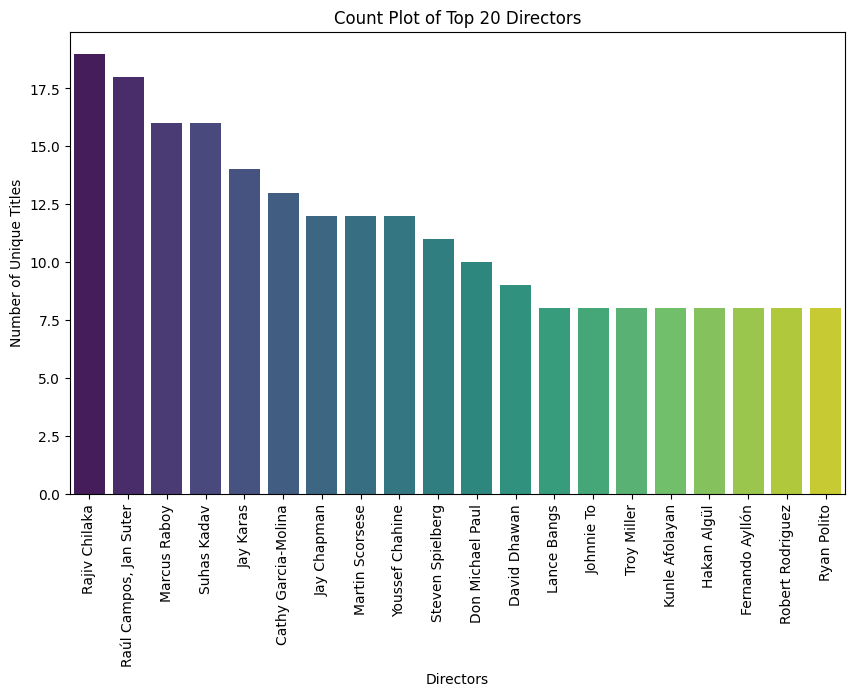

In [139]:
director_counts = df_final.groupby('director')['title'].nunique().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.index, y=director_counts,
palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Number of Unique Titles')
plt.title('Count Plot of Top 20 Directors')
plt.show()

This graph shows top 20 directors who have the most number of titles.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\725069213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.index, y=actor_counts, palette='viridis')


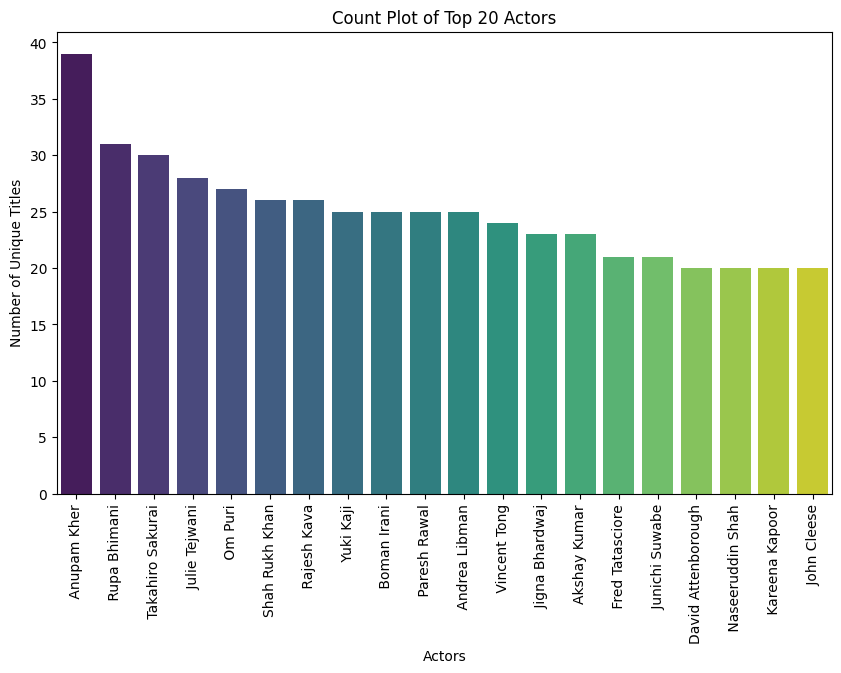

In [141]:
actor_counts = df_final.groupby('cast')['title'].nunique().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.index, y=actor_counts, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Number of Unique Titles')
plt.title('Count Plot of Top 20 Actors')
plt.show()

This graph shows top 20 actors who have the most number of titles and the Anupam Kher has the most number of titles.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\3153731356.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=releaseyear_counts.index, y=releaseyear_counts,


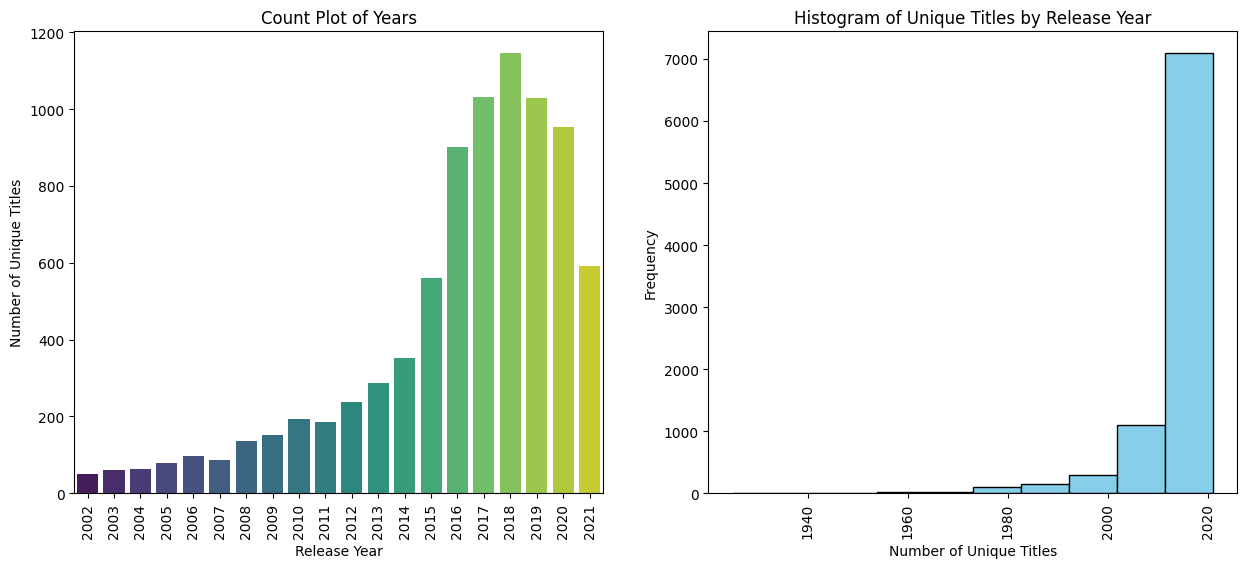

In [142]:
releaseyear_counts = df_final.groupby('release_year')['title'].nunique().sort_values(ascending=False)[:20]
result_list = np.repeat(df_final.groupby('release_year')
['title'].nunique().index, df_final.groupby('release_year')
['title'].nunique())
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=releaseyear_counts.index, y=releaseyear_counts,
palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Titles')
plt.title('Count Plot of Years')
plt.subplot(1, 2, 2)
plt.hist(result_list, bins=10, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Number of Unique Titles')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Titles by Release Year')
plt.show()

These graphs show the years in which majority of titles were made, and the second graph shows
the histogram that represents spread of movies and tv shows over the years.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\4221877869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts,


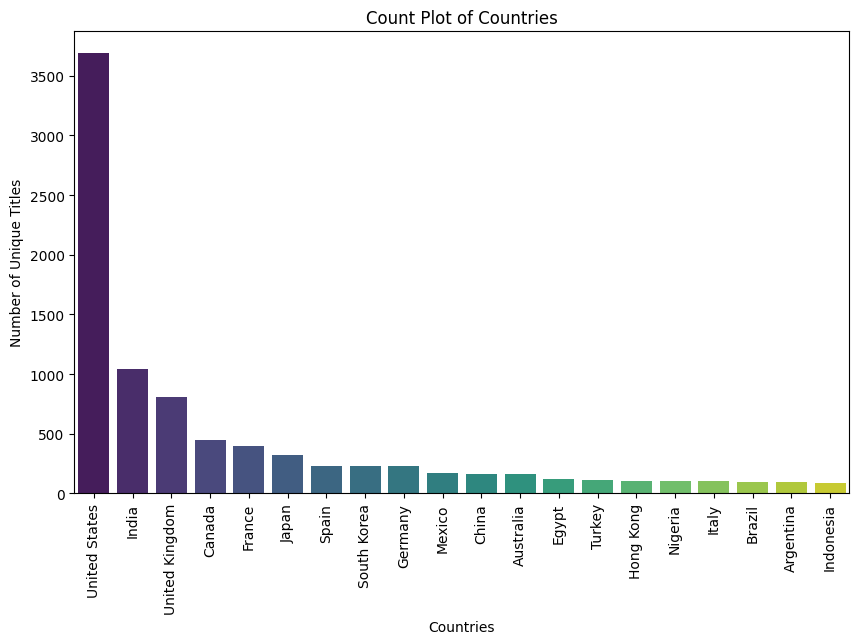

In [143]:
country_counts = df_final.groupby('country')['title'].nunique().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts,
palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Number of Unique Titles')
plt.title('Count Plot of Countries')
plt.show()

It can be seen from above graph that majority of the titles are made for United States.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\1126638516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts, palette='viridis')


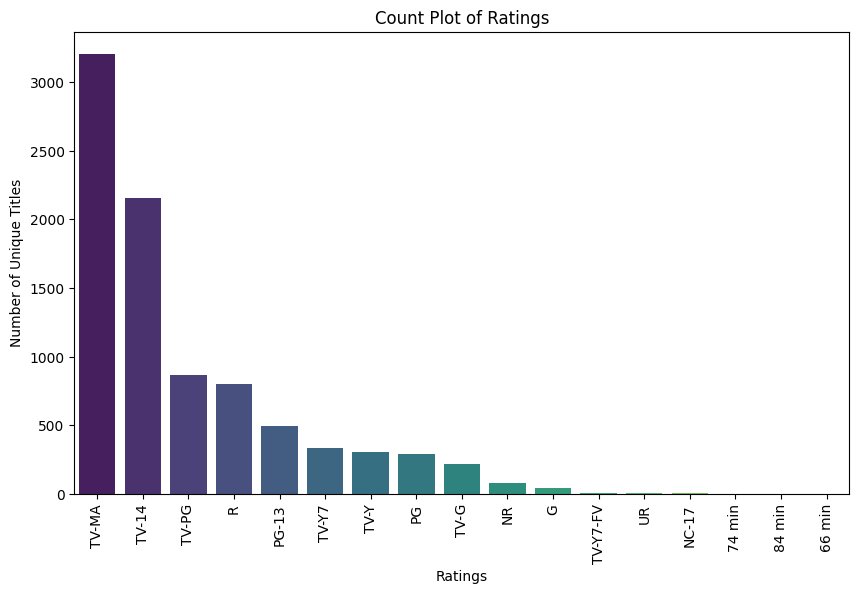

In [145]:
rating_counts = df_final.groupby('rating')['title'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Ratings')
plt.ylabel('Number of Unique Titles')
plt.title('Count Plot of Ratings')
plt.show()

Most of the titles were made for TV-MA rating, followed by TV-14 and the rest followed as in
graph.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\2412895408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts, palette='viridis')


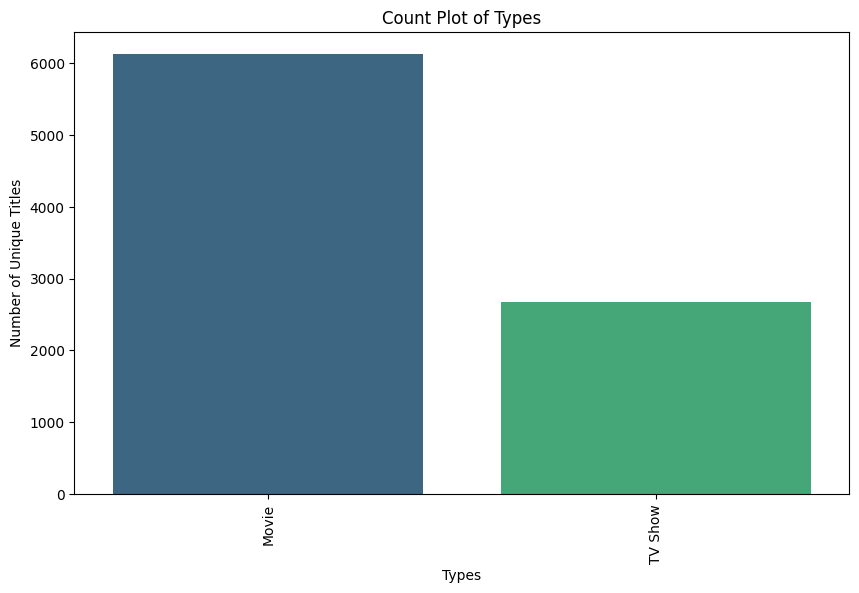

In [146]:
type_counts = df_final.groupby('type')['title'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.ylabel('Number of Unique Titles')
plt.title('Count Plot of Types')
plt.show()

It can be seen from the graph that most titles were movies and tv shows are lesser as compared
to the movies.

In [148]:
movies_counts = df_final.loc[(df_final['type'] ==
'Movie')].sort_values(by='duration_new',
ascending=False).drop_duplicates(subset='title')[:20]
tv_shows_counts = df_final.loc[(df_final['type'] == 'TVShow')].sort_values(by='duration_new',
ascending=False).drop_duplicates(subset='title')[:20]

#### Bivariate analysis

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\2667032672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='duration_new', data=movies_counts,


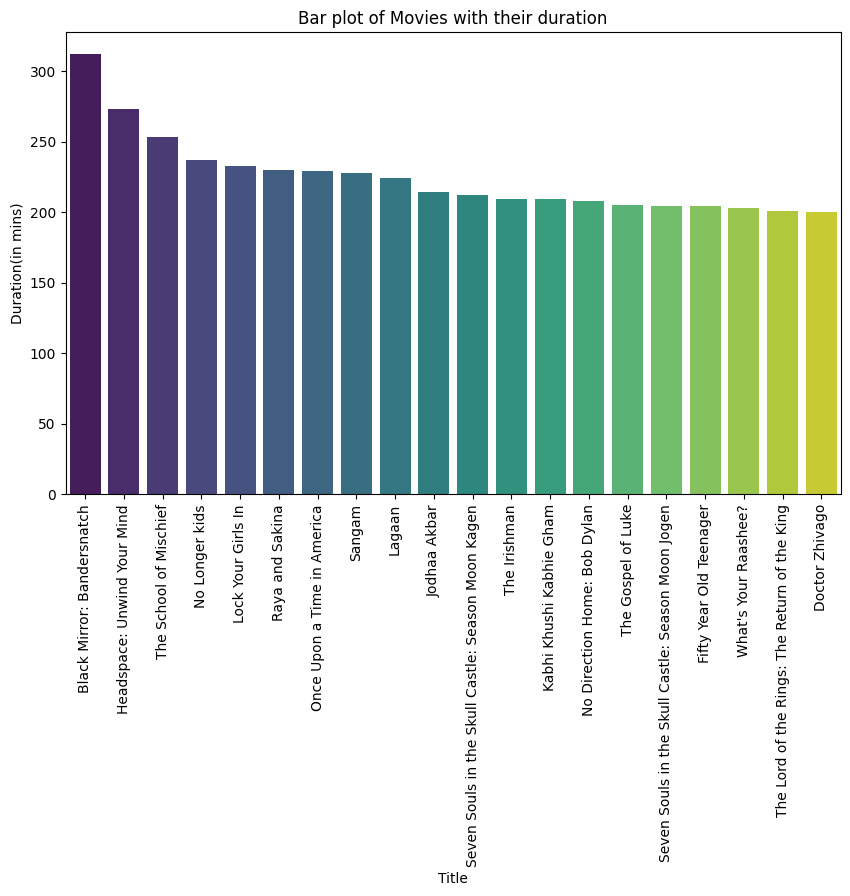

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='duration_new', data=movies_counts,
palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Duration(in mins)')
plt.title('Bar plot of Movies with their duration')
plt.show()

The above graph shows top 20 movies according to their durations in mins.

<Axes: xlabel='duration_new'>

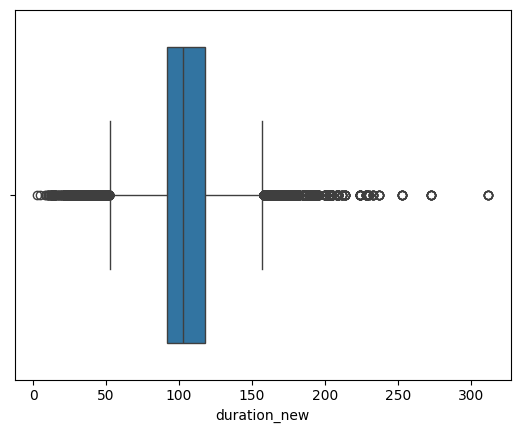

In [150]:
sns.boxplot(x='duration_new',
data=df_final[df_final['type']=='Movie'])

The above graph shows median duration and spread of movies durations.

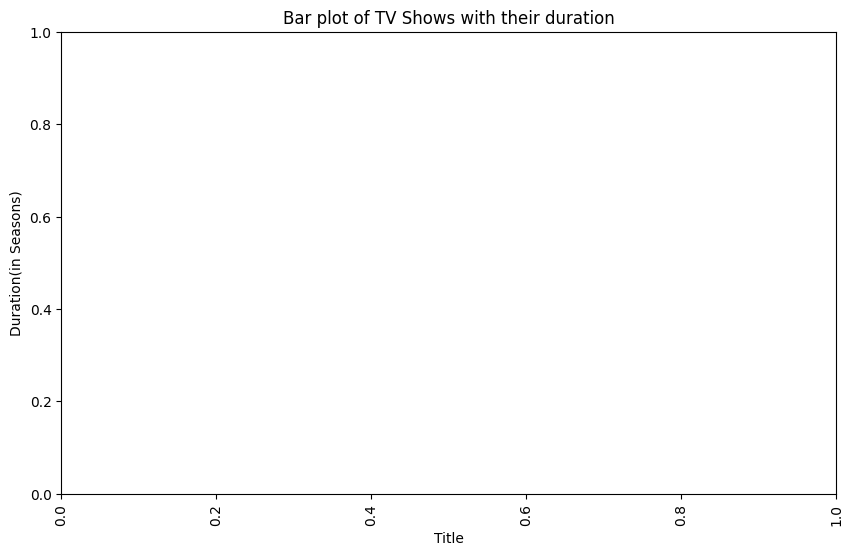

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='duration_new', data=tv_shows_counts,
palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Duration(in Seasons)')
plt.title('Bar plot of TV Shows with their duration')
plt.show()

The above graph shows top 20 tv shows according to their durations in number of seasons they
have in total.

<Axes: xlabel='duration_new'>

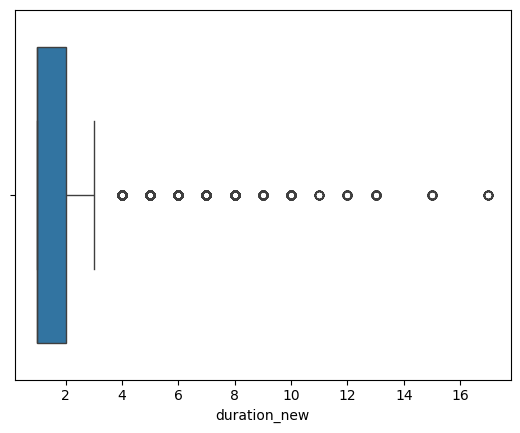

In [157]:
sns.boxplot(x='duration_new', data=df_final[df_final['type']=='TV Show'])

The above graph shows the spread of duration(in seasons) for tv shows.


C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\2645077151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='director', y='release_year',


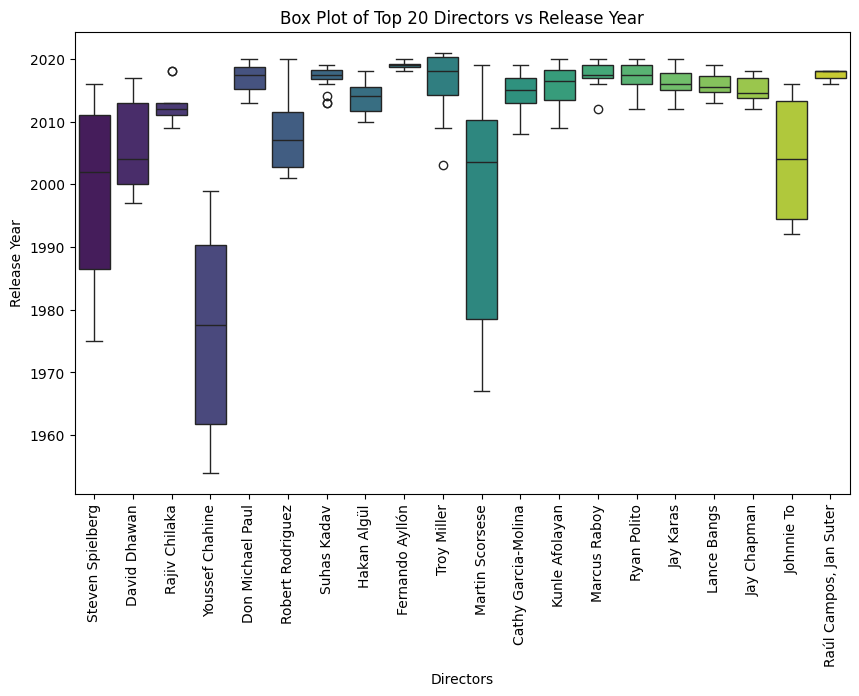

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='director', y='release_year',
data=df_final[df_final['director'].isin(director_counts.index[:20])].drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Release Year')
plt.title('Box Plot of Top 20 Directors vs Release Year')
plt.show()

This graph shows the spread of titles over years for the top 20 directors who made the most
titles.

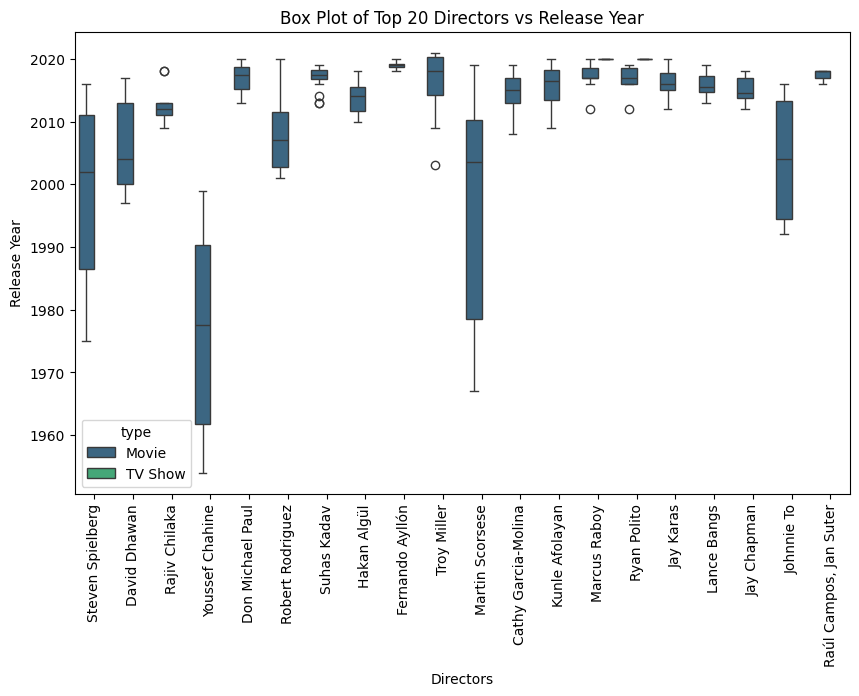

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='director', y='release_year', hue='type',
data=df_final[df_final['director'].isin(director_counts.index[:20])].drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Release Year')
plt.title('Box Plot of Top 20 Directors vs Release Year')
plt.show()

This graph shows the spread of titles over years for the top 20 directors who made the most
titles divided by type of the title.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\121562394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cast', y='release_year',


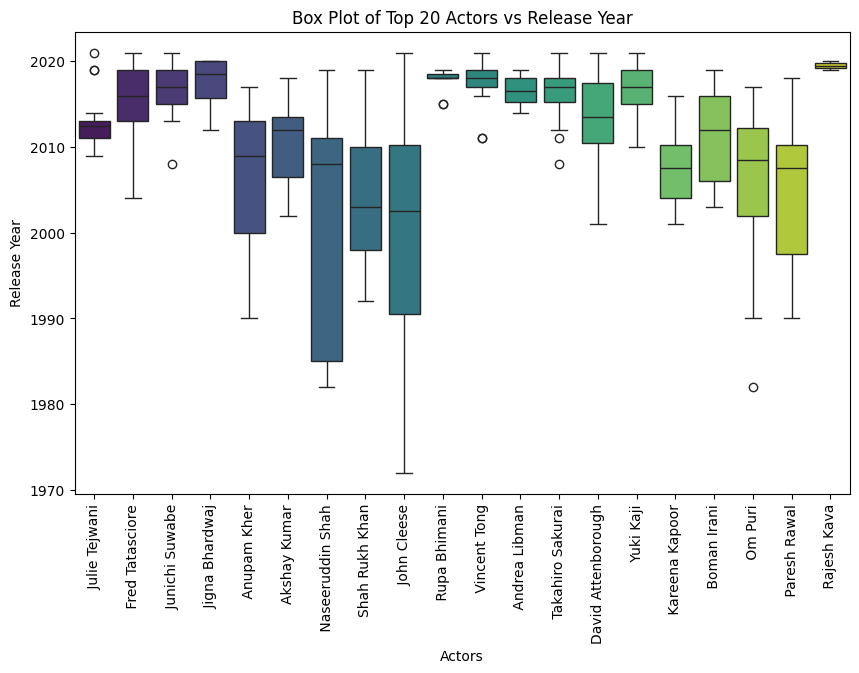

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cast', y='release_year',
data=df_final[df_final['cast'].isin(actor_counts.index[:20])].drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Release Year')
plt.title('Box Plot of Top 20 Actors vs Release Year')
plt.show()

This graph shows the spread of titles over years for the top 20 actors who worked in most titles.

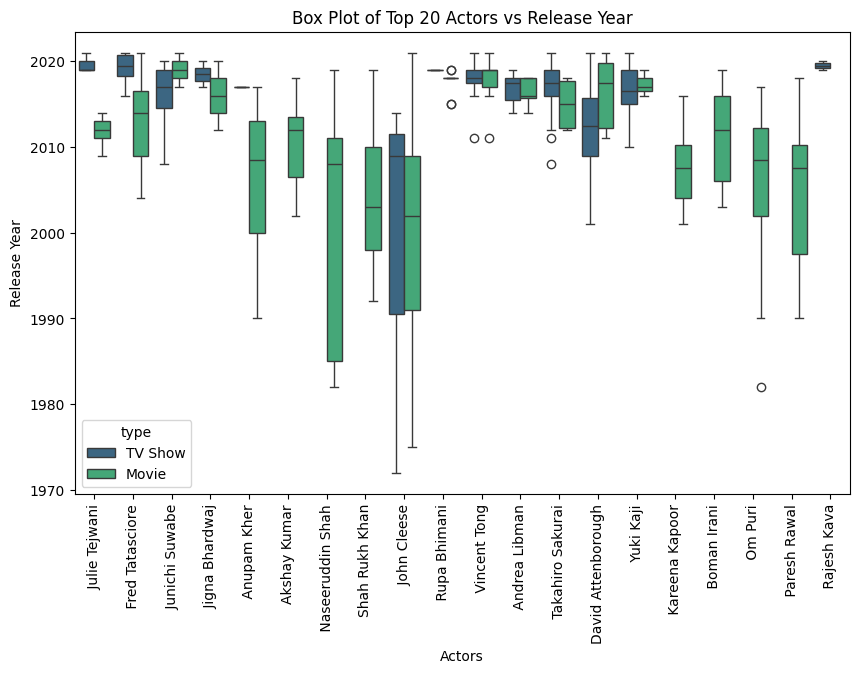

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cast', y='release_year', hue='type',
data=df_final[df_final['cast'].isin(actor_counts.index[:20])].drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Release Year')
plt.title('Box Plot of Top 20 Actors vs Release Year')
plt.show()

The above graph shows top actors titles divided by type.

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\4082153236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y='release_year', data =


Text(0.5, 1.0, 'Box Plot of Types vs Release Year')

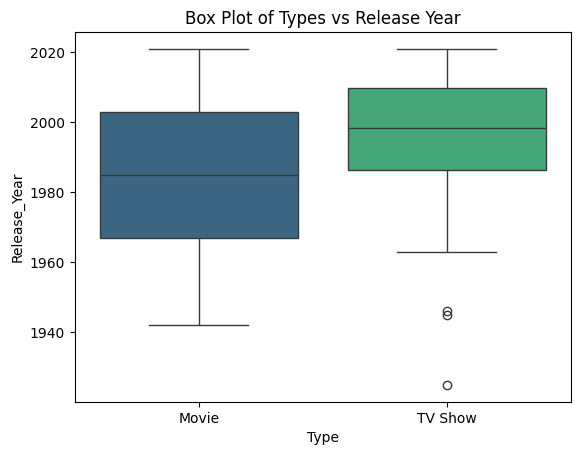

In [163]:
sns.boxplot(x="type", y='release_year', data =
df_final.groupby(['type', 'release_year'])
['title'].nunique().reset_index(), palette='viridis')
plt.xlabel('Type')
plt.ylabel('Release_Year')
plt.title('Box Plot of Types vs Release Year')


It can be seen from above data that median of movies were made around 1980, while tv shows
median is after that in around 2000s.

In [164]:
dd = df_final.groupby(['director', 'release_year'])['type'].nunique().reset_index()
dd = dd.loc[(dd['director'].isin(director_counts.index)) &
(dd['release_year'].isin(releaseyear_counts.index[:5]))]
dd

,director,release_year,type
858,Cathy Garcia-Molina,2017,1
859,Cathy Garcia-Molina,2018,1
860,Cathy Garcia-Molina,2019,1
1231,David Dhawan,2017,1
1406,Don Michael Paul,2016,1
1407,Don Michael Paul,2017,1
1408,Don Michael Paul,2018,1
1409,Don Michael Paul,2019,1
1410,Don Michael Paul,2020,1
1616,Fernando Ayllón,2018,1


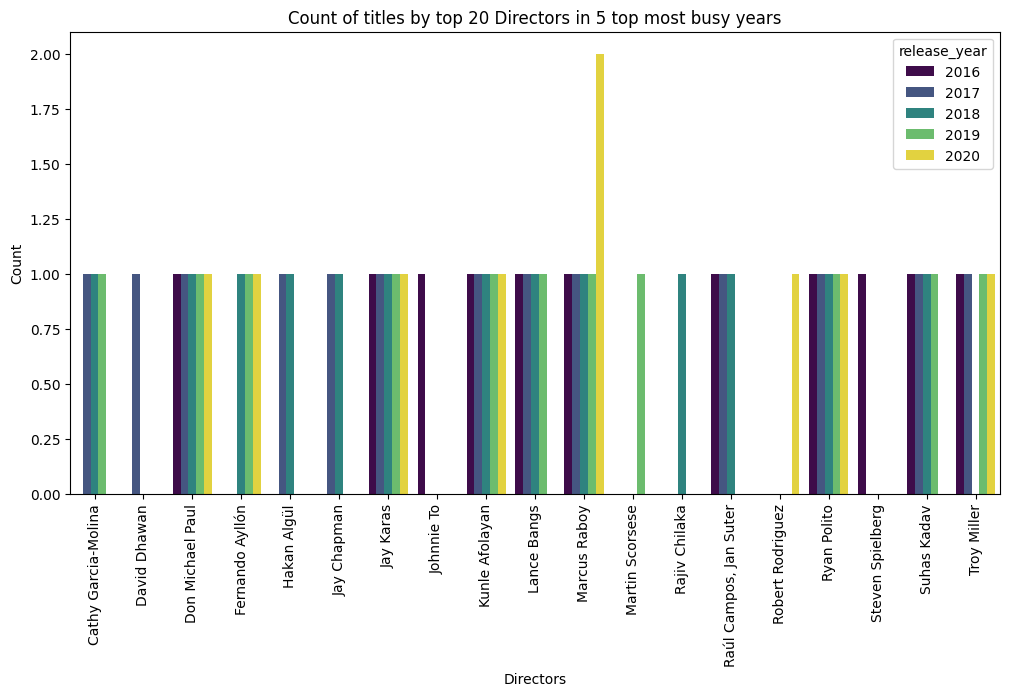

In [165]:
plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='type', hue='release_year', data=dd,
palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Directors')
plt.title('Count of titles by top 20 Directors in 5 top most busy years')
plt.show()

The above graph shows how much titles the top 20 directors made in the most busy years and in
which specific year.

In [166]:
aa = df_final.groupby(['cast', 'release_year'])['type'].nunique().reset_index()
aa = aa.loc[(aa['cast'].isin(actor_counts.index)) &
(aa['release_year'].isin(releaseyear_counts.index[:5]))]
aa

,cast,release_year,type
2876,Andrea Libman,2016,1
2877,Andrea Libman,2017,1
2878,Andrea Libman,2018,2
2879,Andrea Libman,2019,2
2880,Andrea Libman,2020,1
...,...,...,...
53190,David Attenborough,2017,1
53191,David Attenborough,2019,2
53192,David Attenborough,2020,1
57898,Shah Rukh Khan,2017,1


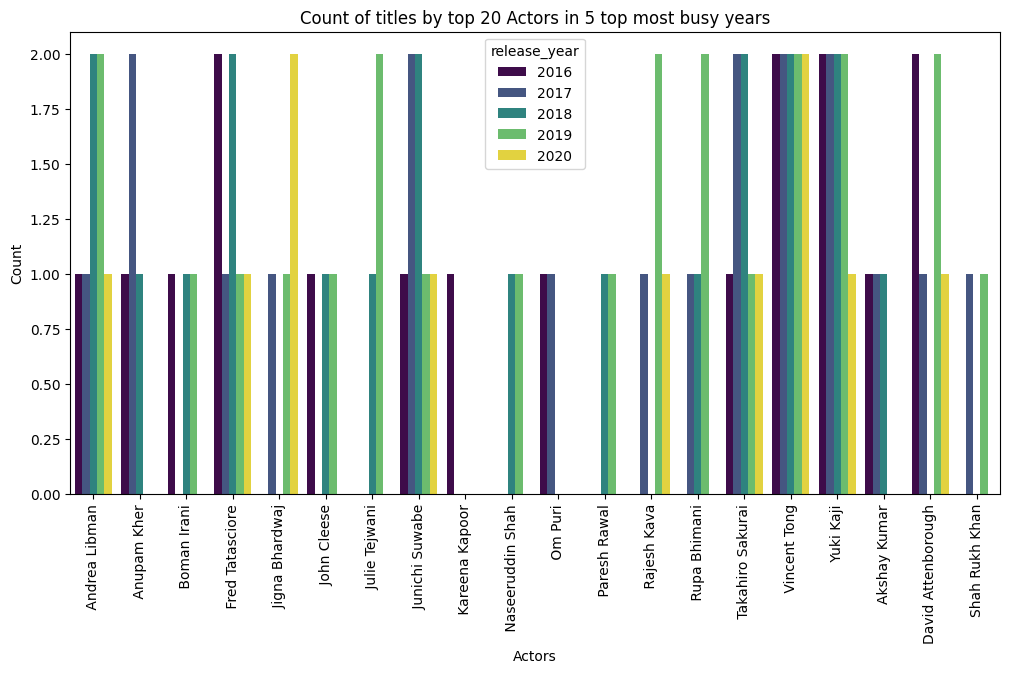

In [167]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cast', y='type', hue='release_year', data=aa,
palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Actors')
plt.title('Count of titles by top 20 Actors in 5 top most busy years')
plt.show()

The above graph shows how much titles the top 20 actors worked in the most busy years and in
which specific year.

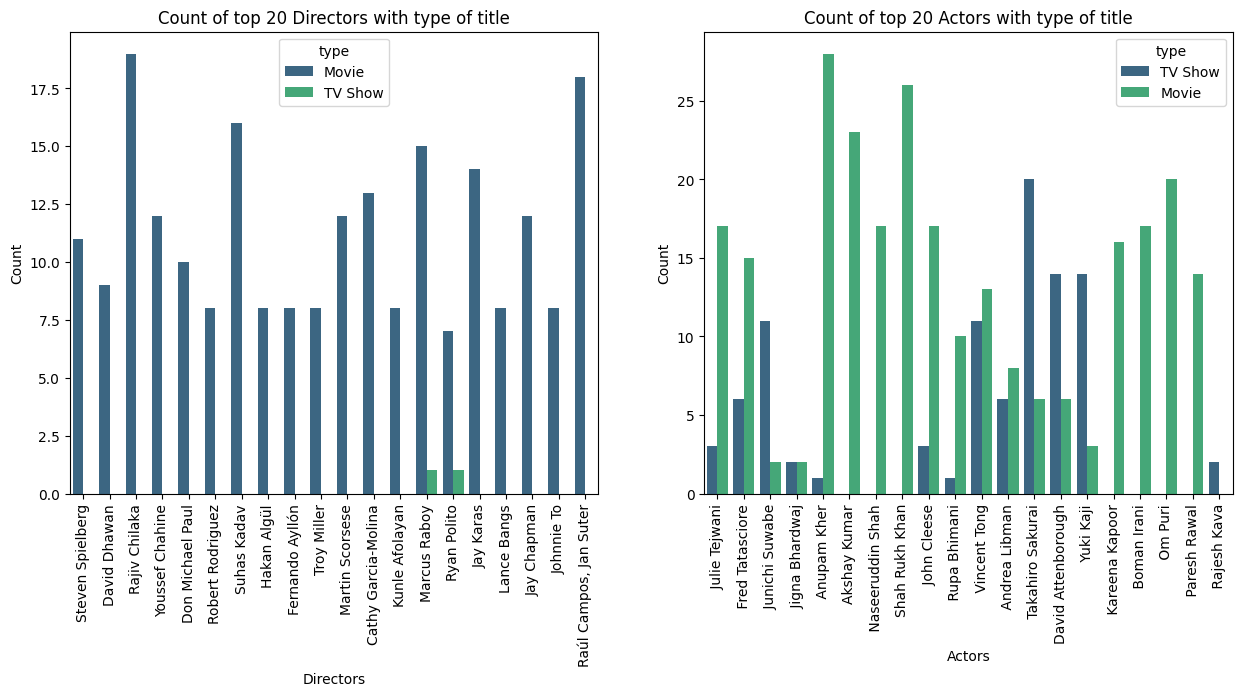

In [172]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='director', hue='type',
data=df_final[df_final['director'].isin(director_counts.index)].drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Count of top 20 Directors with type of title')
plt.subplot(1, 2, 2)
sns.countplot(x='cast', hue='type',data=df_final[df_final['cast'].isin(actor_counts.index)].drop_duplicates(subset='title'),palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Count')
plt.title('Count of top 20 Actors with type of title')
plt.show()

The above graphs show that only one top director made a tv show, but actors on the other hand
work in tv shows as well though not as frequent as in movies

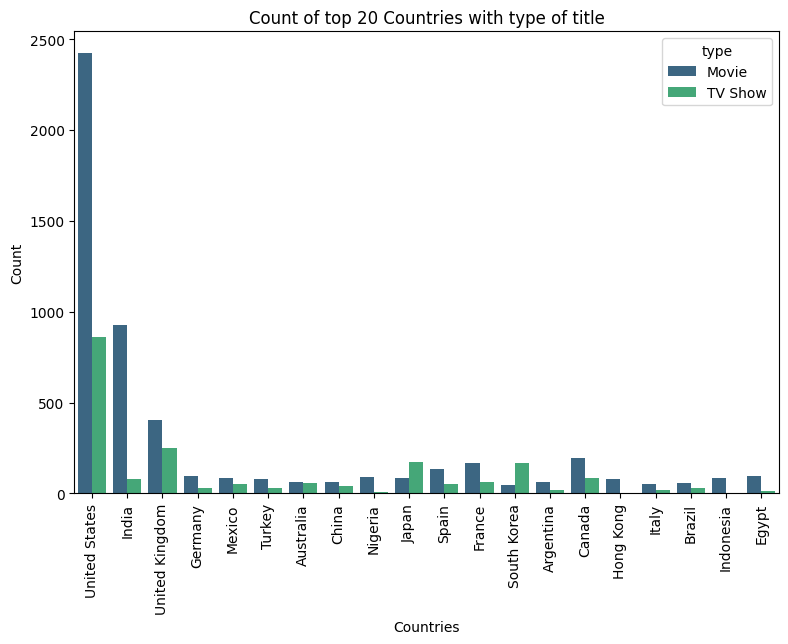

In [174]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='country', hue='type',
data=df_final[df_final['country'].isin(country_counts.index)].drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count of top 20 Countries with type of title')
plt.show()

The above graph shows, moveis and tv shows made for countries, and it can be seen that most
movies as well as tv shows are made for United States.

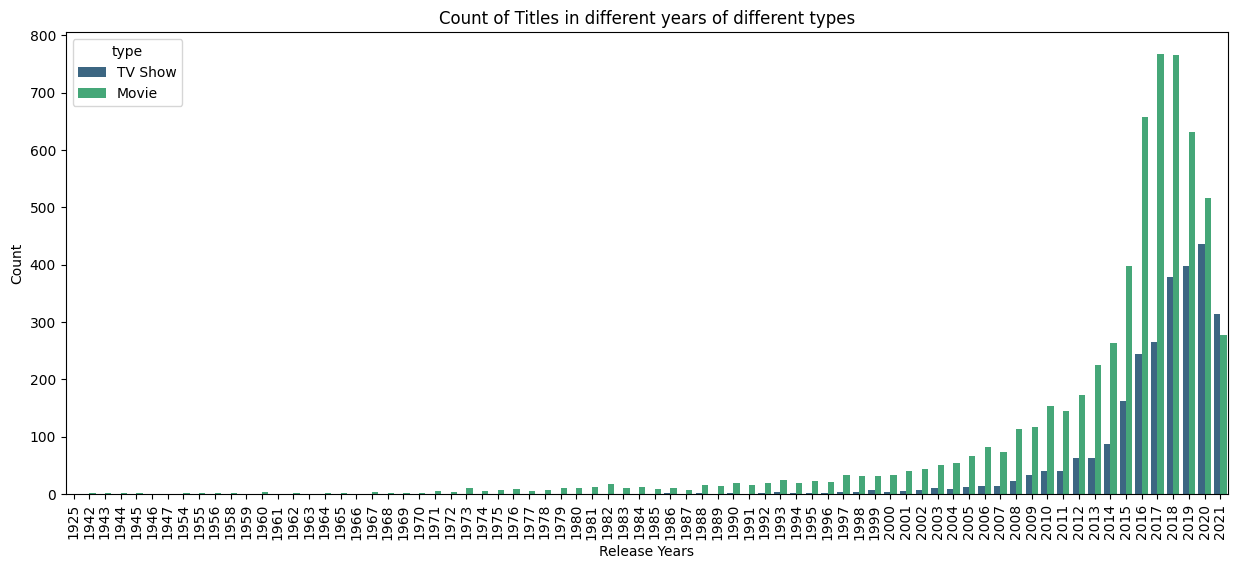

In [175]:
plt.figure(figsize=(15, 6))
sns.countplot(x='release_year', hue='type',
data=df_final.drop_duplicates(subset='title'), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Release Years')
plt.ylabel('Count')
plt.title('Count of Titles in different years of different types')
plt.show()

The above graph shows the spread of the movies and tv shows over the range of years from 1925
to 2021.

<Axes: >

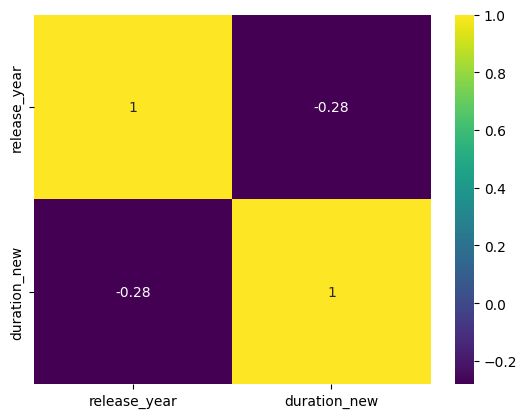

In [184]:
# Create the heatmap
df_num = df_final.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_num.corr(), cmap="viridis", annot=True)


### Missing values and outliers check

In [179]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8712 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


It is visible from above table, there are missing values in some of the columns

C:\Users\kulde\AppData\Local\Temp\ipykernel_10608\2183479551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='release_year',


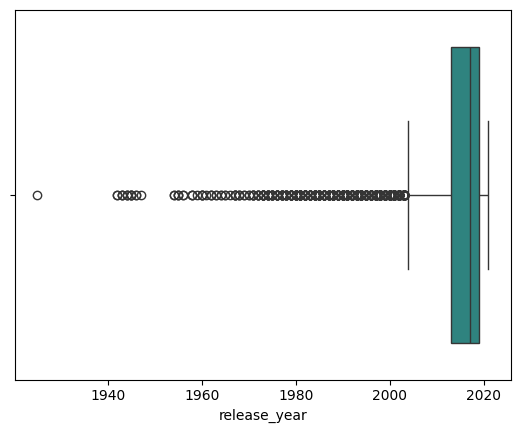

In [180]:
sns.boxplot(x='release_year',
data=df_final.drop_duplicates(subset='title'), palette='viridis')
plt.show()

It can be seen from the above graph that there are outliers in the release_year.

### Business Insights

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy andInternational TV Shows/Movies, so content aligning to that is recommended.

2) Add TV Shows in July/August and Movies in last week of the year/fi rst month of the next year.

3) For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popularalong with the genres in fi rst point, hence recommended.

4) For UK audience, recommended length for movies is same as that of USA (80-120 mins)

5) The target audience in USA and India is recommended to be 14+ and above ratings while for UK, itsrecommended to be completely Mature/R content .

6) Add movies for Indian Audience, it has been declining since 2018.

7) Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.

8) While creating content, take into consideration the popular actors/directors for that country. Also take intoaccount the director-actor combination which is highly recommended.

9) Rajiv Chilaka made the most number of movies, i.e. 19.

10) Anupan Kher acted in the most movies, i.e. 39.

11) Titles starting being made in 1950s, the production saw a boom in the early 2000s and in 2018 most titles were made countring almost to 1200.
12) TV-MA and TV-14 are the ratings most of the titles are made for.

13) More number of movies are made in total than tv shows.

14) Black Mirror is the longest movie in duration having 300+ mins of content while Grey's Anatomy is the longest running TV Show having 19 seasons in total.

15) Majority Top Directors have made their most movies in years 2000-2021 and majority of them have made only movies

### Recommendations
1. The company should start involving titles which target more number of countries, as opposed to targeting only United States.
2. TV Shows should also be included, as right now the count of tv shows is drastically less than count of movies.
3. Old Tv Shows and Movies should be added more, as right now the data is mostly considered of recent titles.
4. Tv Shows could be made with more seasons so customers could delve into their stories more.
5. More titles could be made for non-popular ratings to target the specific viewer category.
6. Tv Shows could be made with top directors and top actors, and their lengths could be made more than average which could pull more audience for longer periods of time.